In [2]:
# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

/Users/mercy/opt/anaconda3/envs/qmind2/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Step 1: Load the Dataset
# Load the mall customers dataset from a CSV file into a Pandas DataFrame.
# This allows for easy data manipulation and analysis.
df_socials = pd.read_csv('datasets/gooddata.csv')
df_socials.head()

,Platform,Post ID,Post Type,Post Content,Post Timestamp,Date,Weekday Type,Time,Time Periods,Likes,...,Engagement Rate,Audience Age,Age Group,Audience Gender,Audience Location,Audience Continent,Audience Interests,Campaign ID,Sentiment,Influencer ID
0,Instagram,16ce29c5-2dc7-478f-9814-a86754f3ce8b,Video,Increase fast partner south.,2023-07-30 6:40,7-30-2023 (Sunday),Weekend,6:40:06,Morning,908,...,91.41,48,Senior Adults,Male,Greece,Europe,population,NaN,Neutral,NaN
1,Facebook,a30c948b-0fb3-4e92-95da-e2dea184f568,Link,Floor glass bring indicate seem detail.,2022-06-19 14:16,6-19-2022 (Sunday),Weekend,14:16:00,Afternoon,604,...,45.82,33,Mature Adults,Female,Lao People's Democratic Republic,Asia,attorney,98705a1e-2573-4cb8-983b-2112d4b140c9,Mixed,NaN
2,Twitter,aee74d06-c775-459c-8fc4-013ce25644f1,Image,Customer stop language everybody rest chance me.,2022-06-04 6:19,6-4-2022 (Saturday),Weekend,6:19:50,Morning,288,...,22.81,23,Adolescent Adults,Other,Jordan,Asia,affect,NaN,Positive,NaN
3,Instagram,80415748-a509-4fc6-8b55-74f2babe5dac,Image,Town find identify game your.,2022-05-12 15:41,5-12-2022 (Thursday),Weekday,15:41:22,Afternoon,870,...,70.95,48,Senior Adults,Male,Sudan,Africa,money,6b15bf9b-14cc-4ab9-9168-56322057b61e,Positive,NaN
4,LinkedIn,14d34185-639a-4508-a8b6-02a743fe0dbc,Link,Seem strategy you cup.,2023-10-26 20:53,10-26-2023 (Thursday),Weekday,20:53:33,Evening,573,...,40.23,40,Mature Adults,Male,Gabon,Africa,part,NaN,Negative,NaN


In [4]:
print(df_socials.columns)

Index(['Platform', 'Post ID', 'Post Type', 'Post Content', 'Post Timestamp',
       'Date', 'Weekday Type', 'Time', 'Time Periods', 'Likes', 'Comments',
       'Shares', 'Impressions', 'Reach', ' Engagement Rate ', 'Audience Age',
       'Age Group', 'Audience Gender', 'Audience Location',
       'Audience Continent', 'Audience Interests', 'Campaign ID', 'Sentiment',
       'Influencer ID'],
      dtype='object')


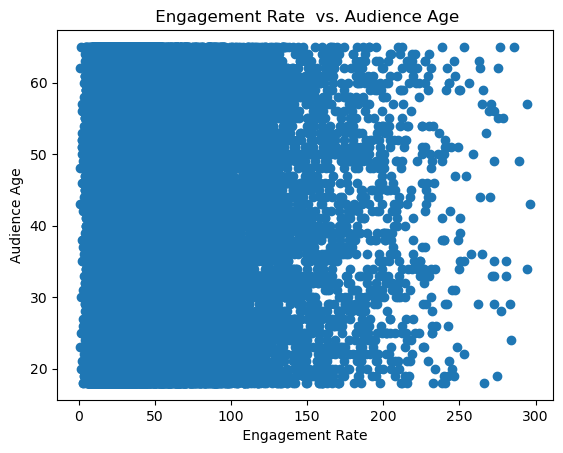

In [11]:
# engagement rate vs. total interactions
col_x = ' Engagement Rate '
col_y = 'Audience Age'

x = df_socials[df_socials['Post Type'] == 'Video'][col_x]
y = df_socials[df_socials['Post Type'] == 'Video'][col_y]
plt.scatter(x, y)
plt.title('engagement rate vs. total interactions')
plt.title(f"{col_x} vs. {col_y}")
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.show()

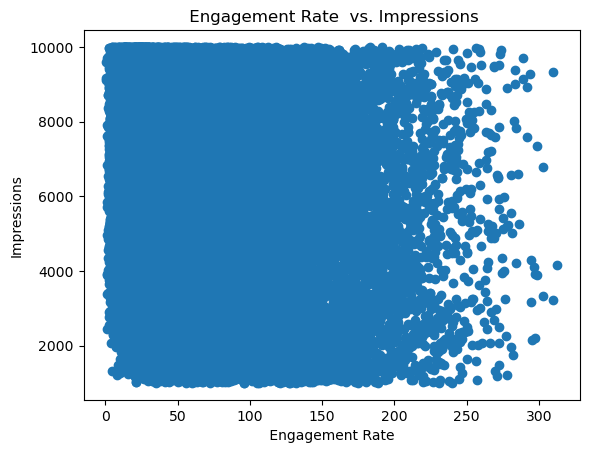

In [29]:
# engagement rate vs. total interactions
col_x = ' Engagement Rate '
col_y = 'Impressions'

x = df_socials[col_x]
y = df_socials[col_y]
plt.scatter(x, y)
plt.title('engagement rate vs. total interactions')
plt.title(f"{col_x} vs. {col_y}")
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.show()

/var/folders/kl/mf67c0m52sn81pgn606s8rh40000gn/T/ipykernel_24258/2077457629.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(month_order, rotation=45)


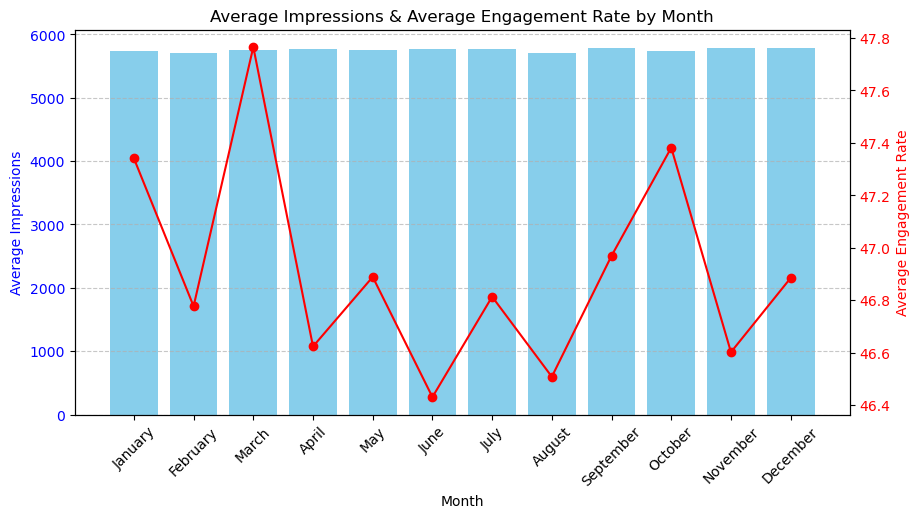

In [30]:

# Ensure 'Post Timestamp' is in datetime format
df_socials['Post Timestamp'] = pd.to_datetime(df_socials['Post Timestamp'])

# Extract month name
df_socials['Month'] = df_socials['Post Timestamp'].dt.month_name()

# Calculate total Impressions and average Engagement Rate per month
monthly_data = df_socials.groupby('Month').agg({'Impressions': 'mean', ' Engagement Rate ': 'mean'})

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(month_order)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart for Impressions
ax1.bar(monthly_data.index, monthly_data['Impressions'], color='skyblue', label='Total Impressions')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Impressions', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line graph for Engagement Rate
ax2 = ax1.twinx()
ax2.plot(monthly_data.index, monthly_data[' Engagement Rate '], color='red', marker='o', linestyle='-', label='Avg Engagement Rate')
ax2.set_ylabel('Average Engagement Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Formatting
plt.title('Average Impressions & Average Engagement Rate by Month')
ax1.set_xticklabels(month_order, rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

/var/folders/kl/mf67c0m52sn81pgn606s8rh40000gn/T/ipykernel_24258/1578138258.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(month_order, rotation=45)


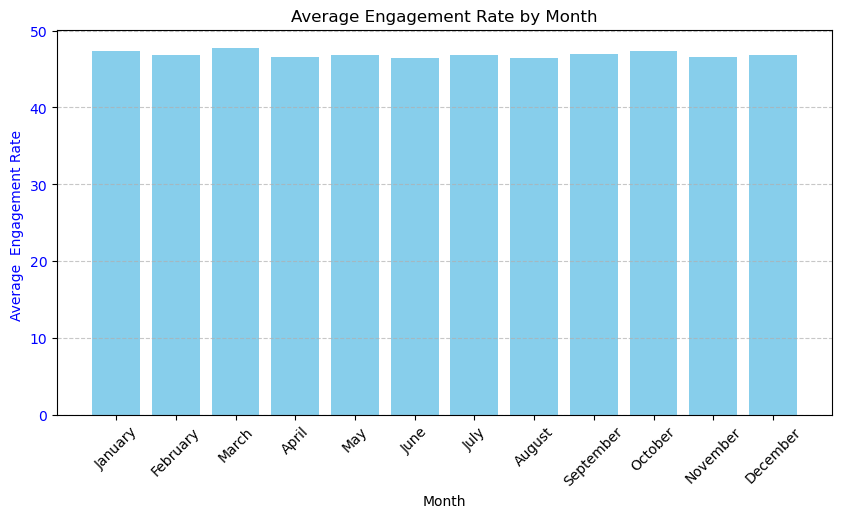

In [36]:
# sanity check

# Ensure 'Post Timestamp' is in datetime format
df_socials['Post Timestamp'] = pd.to_datetime(df_socials['Post Timestamp'])

# Extract month name
df_socials['Month'] = df_socials['Post Timestamp'].dt.month_name()

# Calculate total Impressions and average Engagement Rate per month
monthly_data = df_socials.groupby('Month').agg({' Engagement Rate ': 'mean'})

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(month_order)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart for Impressions
ax1.bar(monthly_data.index, monthly_data[' Engagement Rate '], color='skyblue', label='Total Engagement Rate ')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average  Engagement Rate ', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Formatting
plt.title('Average Engagement Rate by Month')
ax1.set_xticklabels(month_order, rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

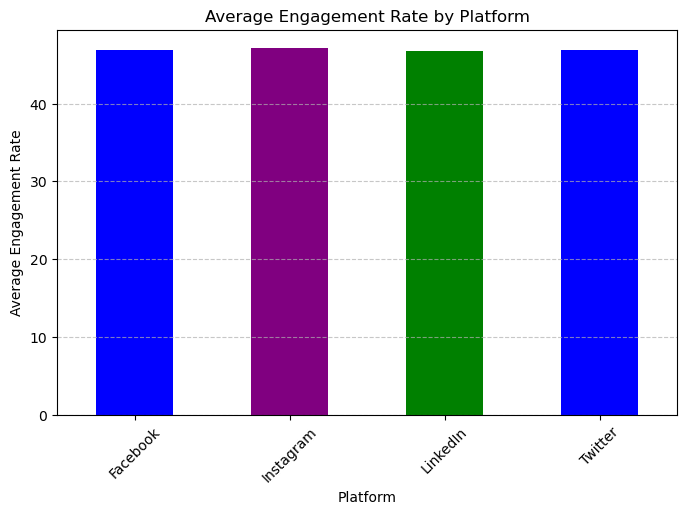

In [31]:

# Calculate average engagement rate by platform
avg_engagement = df_socials.groupby('Platform')[' Engagement Rate '].mean()

# Plot the bar chart
plt.figure(figsize=(8, 5))
avg_engagement.plot(kind='bar', color=['blue', 'purple', 'green'])

# Formatting the chart
plt.title('Average Engagement Rate by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

/var/folders/kl/mf67c0m52sn81pgn606s8rh40000gn/T/ipykernel_24258/573647433.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y=' Engagement Rate ', data=df_socials, palette='coolwarm')


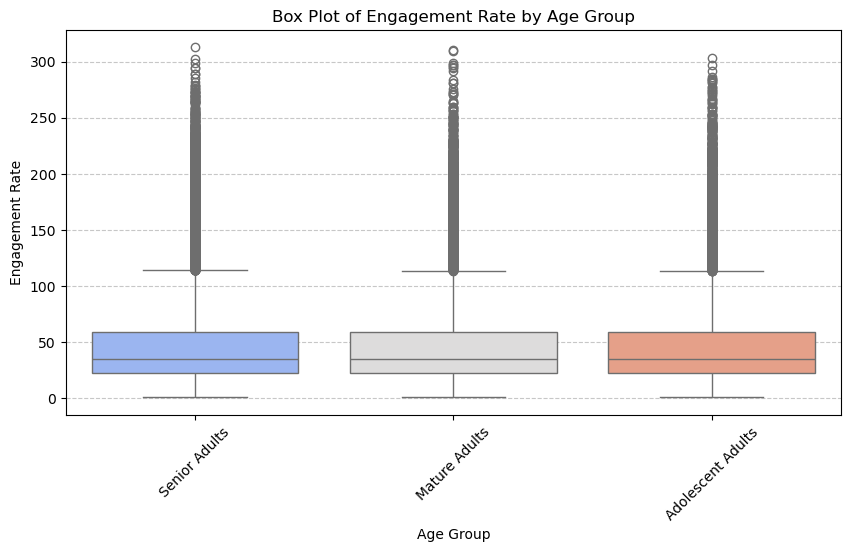

In [32]:

# Ensure Engagement Rate is numeric
df_socials[' Engagement Rate '] = pd.to_numeric(df_socials[' Engagement Rate '], errors='coerce')

# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age Group', y=' Engagement Rate ', data=df_socials, palette='coolwarm')

# Formatting
plt.xlabel('Age Group')
plt.ylabel('Engagement Rate')
plt.title('Box Plot of Engagement Rate by Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [33]:

# Group by location and calculate the average engagement rate
# heatmap_data = df_socials.groupby('Audience Location')[' Engagement Rate '].mean().reset_index()

# # Pivot table for heatmap format
# heatmap_pivot = heatmap_data.pivot(index='Audience Location', columns=None, values=' Engagement Rate ')

# # Plot the heatmap
# plt.figure(figsize=(8, 10))
# sns.heatmap(heatmap_pivot, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# # Formatting
# plt.xlabel('Engagement Rate')
# plt.ylabel('Audience Location')
# plt.title('Heatmap of Engagement Rate by Location')

# # Show plot
# plt.show()

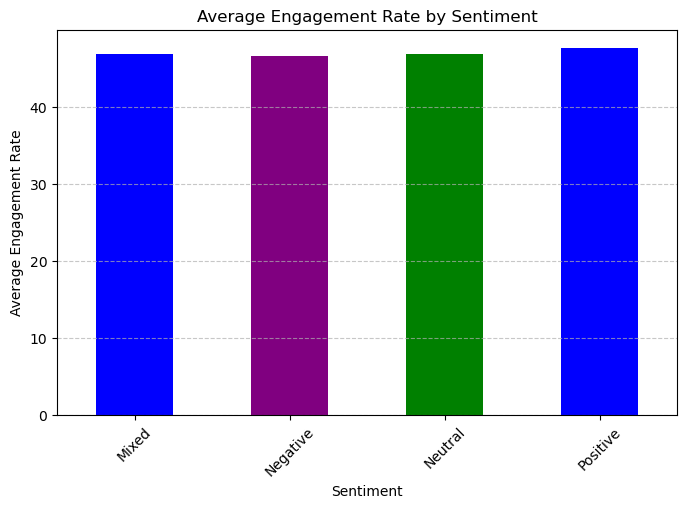

In [34]:

# Calculate average engagement rate by platform
avg_engagement = df_socials.groupby('Sentiment')[' Engagement Rate '].mean()

# Plot the bar chart
plt.figure(figsize=(8, 5))
avg_engagement.plot(kind='bar', color=['blue', 'purple', 'green'])

# Formatting the chart
plt.title('Average Engagement Rate by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

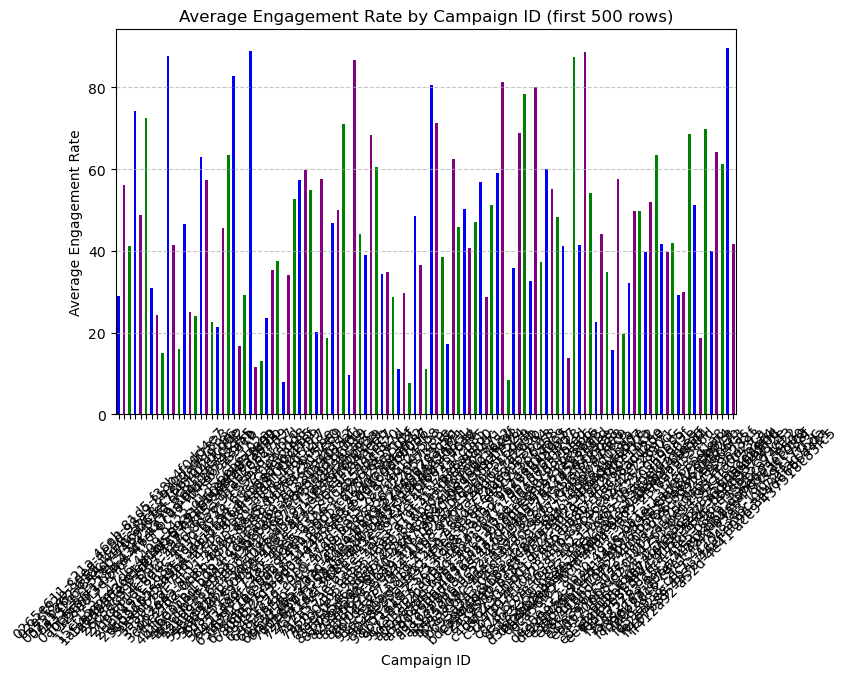

In [35]:
# Calculate average engagement rate by platform
avg_engagement = df_socials[:500].groupby('Campaign ID')[' Engagement Rate '].mean()

# Plot the bar chart
plt.figure(figsize=(8, 5))
avg_engagement.plot(kind='bar', color=['blue', 'purple', 'green'])

# Formatting the chart
plt.title('Average Engagement Rate by Campaign ID (first 500 rows)')
plt.xlabel('Campaign ID')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()